________
# __Machine Learning Project (using Scikit):__
## __Accurately predict “Injury” and “Property Damage” variable__
#### By Varun Grewal  
<a href="https://www.linkedin.com/in/varungrewal/">LinkedIn</a> | <a href="https://github.com/varungrewal">Github</a>

____
### Relevant Links:        
<a href="https://github.com/varungrewal/Machine-Learning-using-Scikit-/blob/main/Presentation%20-%20Machine%20Learning%20(using%20Scikit)%20By%20Varun%20Grewal.pdf">Presentation</a> | <a href="https://drive.google.com/file/d/1l2E1zqmXeG9cYv9l7QVbJC11romEIzjV/view?usp=sharing">Data</a> | <a href="https://drive.google.com/file/d/1708cQKd6_7WzljclAtiOJhk6zb2e8lZs/view?usp=sharing">Meta Data</a> 
_____

### Tools Used: 
__IDE:__ Jupyter Notebook | __Language:__ Python       
__Packages:__ NumPy | Pandas | Scikit-Learn | SciPy | Matplotlib | Seaborn | IPywidgets 
_____

<a id='TOC'></a>
### <u>Table of Contents:</u> 
1. [Introduction](#1)      
    1.1 [Goal](#1.1)           
    1.2 [Expected Outcome](#1.2)    
2. [Data Description](#2)    
    2.1 [Intialize](#2.1)     
    2.2 [Understanding Raw Data](#2.2)      
3. [ETL (Data Preparation, Cleaning, Wrangling, Manipulation and Check)](#3)                 
4. [Machine Learning](#4)      
    4.1 [Functions](#4.1)           
    4.2 [Descriptive Statistical Analysis](#4.2)        
    4.3 [Statistical Visualization](#4.3)          
    4.4 [Model 1 - Simple Regression](#4.4)           
    4.5 [Model 2 - Multiple Linear Regression](#4.5)            
    4.6 [Model 3 - Decision Tree (Classification) and Confusion Matrix](#4.6)                      
5. [Future Applications](#5)

<p style="color:green"> Note: Select any cell and press TAB to come back to Table of Contents </p> 


_____
<a id='1'></a>
### 1. Introduction
____

All big urban cities whether it is Barcelona, Tokyo, Mumbai or Seattle, share one common attribute i.e. they are dense (more people packed in less space). This high density of people and vehicles combined with dynamic nature of city life creates an interesting set of challenges for the public office holders (mayor, city council members, etc.), city/transportaion planners and other emergency service providers such as police, fire and medical technicians. One such challenge is "Traffic Collisions" and it has multiple negative consequences, such as: 
- It can result in loss of human life or a life altering serious injury. 
- It can result in property damage/financial loss to both the people involved and the city. 
- It can cause traffic jams lasting hours which can result in billons of dollars in lost productivity. 
- It creates unsafe road conditions for other drivers. 

_____
<a id='1.1'></a>
### 1.1 Goal 
_____
The goal of this project is to: 
- Take a deep dive into the "Collisions" historical dataset for the city of Seattle
- Discover the statistical relationships between different variables 
- Build Regression and Decision Tree model to deliver accurate predictions for "Injury" and "Property Damage" variable

____
<a id='1.2'></a>
### 1.2 Expected Outcome
____
A machine learning model with high accuracy that can be used by governmental and non-profit organizations in following ways:
- To better predict the Injury and Property Damage collisions
- To priortise actions items related to collision preparedness and resource allocation
- Achieve better return on investment
- Minimize road mishaps/property damage in general

<a id='2'></a>
____ 
### 2. Data Description  
____
The raw data under consideration for this project is the 'Collision Data" sourced from the Seattle Police Department for the year 2004-2020. Actual dataset is much larger. But, for this project I have limited the scope of the dataset to focus on two variables "Property Damage Collision" and "Injury Collision".

Preliminary analysis suggests that data is mostly clean and complete. However, some cleaning might be required to make it ideal for modeling and analysis. Size of the dataset is approx. 195K rows and 38 columns.
Dataset is of medium complexity as there are multiple variables that can potentially impact the severity of the collision. Data is of mixed nature with integer, float, date and categorical variables being present. That means, it will require preprocessing and potentially normalization.  

Note: Data is missing following important variables:
- Age
- Gender
- Make/Model of the vehicle

<a id='2.1'></a>
_____
### 2.1 Intialize:
Import/Load all the required packages and the dataset
_____

In [1]:
import pandas as pd
import numpy as np

In [2]:
%%capture
! pip install seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
from scipy import stats
import scipy.optimize as opt
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, log_loss
import itertools
from sklearn.preprocessing import PolynomialFeatures

In [4]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [15]:
mpl.style.use(['ggplot'])

In [57]:
path='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(path)

df.head(1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.70314,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


<a id='2.2'></a>
_____
### 2.2 Understanding Raw Data 
To get basic understanding (size,shape, etc.) of the dataset
____

In [58]:
print('Raw Data Dimensions (Rows/Columns):',df.shape)

Raw Data Dimensions (Rows/Columns): (194673, 38)


In [59]:
print ("Column Names: ")
print("-------------------------------")
df.columns.values 

Column Names: 
-------------------------------


array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

In [60]:
df.index.values

array([     0,      1,      2, ..., 194670, 194671, 194672])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

<a id='3'></a>
_____
### 3. ETL (Data Preparation, Cleaning, Wrangling, Manipulation and Check)
____


In [62]:
# To be consistent, making all column labels as type string
df.columns = list(map(str, df.columns))

# Fixing datatype for DATETIME variables
df[["INCDATE"]] = df[["INCDATE"]].astype("datetime64")
df[["INCDTTM"]] = df[["INCDTTM"]].astype("datetime64")

# Renaming the Severity variables to improve readability
df["SEVERITYDESC"].replace("Property Damage Only Collision", "Property Damage", inplace=True)
df["SEVERITYDESC"].replace("Injury Collision", "Injury", inplace=True)

# Adding needed columns for analysis of Big Picture
df[["COMB"]] = df['SEVERITYDESC']+"/"+df['COLLISIONTYPE']+"/"+df['JUNCTIONTYPE']
df["COMB"] = df.COMB.astype(str)
df[["COMB-COND"]] = df['WEATHER']+"/"+df['ROADCOND']+"/"+df['LIGHTCOND']
df["COMB-COND"] = df["COMB-COND"].astype(str)

# Adding needed columns for analysis of DATETIME variables
df['DATE'] = pd.to_datetime(df['INCDTTM'], format='%d-%m-%y', errors='coerce').dt.floor('D')
df['YEAR'] = pd.DatetimeIndex(df['INCDTTM']).year
df['MONTH'] = pd.DatetimeIndex(df['INCDTTM']).month
df['DAY'] = pd.DatetimeIndex(df['INCDTTM']).day
df['WEEKDAY'] = df['DATE'].dt.day_name()
df['WEEKDAYNUM'] = df['DATE'].dt.dayofweek
df['TIME'] = pd.DatetimeIndex(df['INCDTTM']).time
df['TIME2']=pd.to_datetime(df['INCDTTM']).dt.strftime('%I:%M %p')
df['TIME3']=pd.to_datetime(df['INCDTTM']).dt.strftime('%p')

# Adding needed columns for Business/Finance inspired metrics
bins = [1,3,6,9,12]
quarter = ["Q1","Q2","Q3","Q4"]
df['QUARTER'] = pd.cut(df['MONTH'], bins, labels=quarter,include_lowest=True)
df['QUARTER'] = df.QUARTER.astype(str)
df['YR-QTR'] = df['YEAR'].astype("str")+ "-" + df['QUARTER']

# Adding needed columns for Seasonal effect metrics
bins2 = [1,2,5,8,11,12]
season = ["WINTER","SPRING","SUMMER","FALL","WINTER"]
df['SEASON'] = pd.cut(df['MONTH'], bins2, labels=season,ordered=False, include_lowest=True)
bins3 = [0,1,2,3,4,5,6,7,8,9,10,11,12]
rainfall = [5.2,3.9,3.3,2.0,1.6,1.4,0.6,0.8,1.7,3.3,5.0,5.4]
df['AVGRAINFALL-INCHES'] = pd.cut(df['MONTH'], bins3, labels=rainfall,ordered=False, include_lowest=True)
temp = [45,48,52,56,64,69,72,73,67,59,51,47]
df['AVGTEMP-F'] = pd.cut(df['MONTH'], bins3, labels=temp,ordered=False, include_lowest=True)
daylight = [9,10,12,14,15,16,16,14,13,11,9,9]
df['AVGDAYLIGHT-HRS'] = pd.cut(df['MONTH'], bins3, labels=daylight,ordered=False, include_lowest=True)
df[['AVGRAINFALL-INCHES']] = df[['AVGRAINFALL-INCHES']].astype("float")
df[['AVGTEMP-F']] = df[["AVGTEMP-F"]].astype("int")
df[['AVGDAYLIGHT-HRS']] = df[["AVGDAYLIGHT-HRS"]].astype("int")

# Adding needed columns for analysis of GPS variable
df["GPS"] = round(df['X'],7).astype("str")+ ","+round(df['Y'],7).astype("str")

# Dropping unnecessary columns
df.drop(['OBJECTID','INCKEY','INTKEY','COLDETKEY','REPORTNO','STATUS','SEVERITYCODE.1','INCDTTM','INCDATE','EXCEPTRSNCODE','EXCEPTRSNDESC', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY', 'ST_COLCODE'], axis=1, inplace=True)
df.head(1)

# list of columns after changes
df.columns

# To see if dataset has any missing rows
missing_data = df.isnull()
missing_data.head(1)

# To identiy and list columns with missing values
#for column in missing_data.columns.values.tolist():
   # print(column)
   # print (missing_data[column].value_counts())
    #print("________________________________________") 

# Dropping missing data rows to make sure data is complete
df.dropna(subset=["X"], axis=0, inplace=True)
df.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)
df.dropna(subset=["UNDERINFL"], axis=0, inplace=True)
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.dropna(subset=["JUNCTIONTYPE"], axis=0, inplace=True)
df.dropna(subset=["WEATHER"], axis=0, inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)

# Drop incomplete data i.e. Year 2020
df.drop(df[df.YEAR > 2019].index, inplace=True)

# Reset index, because we dropped rows
df.reset_index(drop=True, inplace=True)
print('Data Dimensions (Rows/Columns) after cleaning:',df.shape)
df.head(1)


# Steps to prepare data for future analysis

# Converting Y/N to 1/0
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)
df["HITPARKEDCAR"].replace("N", 0, inplace=True)
df["HITPARKEDCAR"].replace("Y", 1, inplace=True)
# Filling missing values
df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace("Y", 1, inplace=True)
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)

# Correcting datatype
df[["UNDERINFL"]] = df[["UNDERINFL"]].astype("int")
df[["PEDROWNOTGRNT"]] = df[["PEDROWNOTGRNT"]].astype("int")
df[["SPEEDING"]] = df[["SPEEDING"]].astype("int")
df[["INATTENTIONIND"]] = df[["INATTENTIONIND"]].astype("int")
df[["HITPARKEDCAR"]] = df[["HITPARKEDCAR"]].astype("int")
df[['YEAR']] = df[['YEAR']].astype("int")
df[['MONTH']] = df[['MONTH']].astype("int")
df[['DAY']] = df[['DAY']].astype("int")

# adding columns for analysis of state of mind
df[["COMB-MIND"]] = df['INATTENTIONIND']+df['UNDERINFL']+df['SPEEDING']
df["COMB-MIND"] = df["COMB-MIND"].astype(int)
df.head(1)


# Check missing data
missing_data = df.isnull()
#for column in missing_data.columns.values.tolist():
   # print(column)
   # print (missing_data[column].value_counts())
   # print("________________________________________") 
if missing_data.bool == True:
    print("----There is still missing data----")
else:
    print("----There is no missing data----")

# Print unique values and its count for each column
col_name = df.columns.tolist()
row_num = df.index.tolist()

#for i,x in enumerate(col_name):
  #  print ("Unique value count of: ", x)
  #  print ("------------------------------------------")
   # print(df[x].value_counts())
   # print ("__________________________________________")


# create dummy variable to split SEVERITYDESC
dummy_var = pd.get_dummies(df["SEVERITYDESC"])
dum_list = dummy_var.columns.values.tolist()
dum_list2 = [x.upper() for x in dum_list]
#print(dum_list2)
dummy_var.columns = dum_list2
#dummy_var.head(1)

# create dummy variable to split COLLISIONTYPE
dummy_var1 = pd.get_dummies(df["COLLISIONTYPE"])
dum_list = dummy_var1.columns.values.tolist()
#dummy_var1.head(1)
dum_list2 = [x.upper() for x in dum_list]
#print(dum_list2)
dummy_var1.columns = dum_list2
dummy_var1.rename(columns={'OTHER':'COLLISIONTYPE-OTHER'}, inplace=True)
#dummy_var1.head(1)

# create dummy variable to split ROADCOND
dummy_var2 = pd.get_dummies(df["ROADCOND"])
dum_list = dummy_var2.columns.values.tolist()
#dummy_var2.head(1)
dum_list2 = [x.upper() for x in dum_list]
#print(dum_list2)
dummy_var2.columns = dum_list2
dummy_var2.rename(columns={'OTHER':'ROADCOND-OTHER'}, inplace=True)
dummy_var2.rename(columns={'UNKNOWN':'ROADCOND-UNKNOWN'}, inplace=True)
#dummy_var2.head(1)

# create dummy variable to split LIGHTCOND
dummy_var3 = pd.get_dummies(df["LIGHTCOND"])
dum_list = dummy_var3.columns.values.tolist()
#dummy_var3.head(1)
dum_list2 = [x.upper() for x in dum_list]
#print(dum_list2)
dummy_var3.columns = dum_list2
dummy_var3.rename(columns={'OTHER':'LIGHTCOND-OTHER'}, inplace=True)
dummy_var3.rename(columns={'UNKNOWN':'LIGHTCOND-UNKNOWN'}, inplace=True)
#dummy_var3.head(1)

# create dummy variable to split WEATHER
dummy_var4 = pd.get_dummies(df["WEATHER"])
dum_list = dummy_var4.columns.values.tolist()
#dummy_var3.head(1)
dum_list2 = [x.upper() for x in dum_list]
#print(dum_list2)
dummy_var4.columns = dum_list2
dummy_var4.rename(columns={'OTHER':'WEATHER-OTHER'}, inplace=True)
dummy_var4.rename(columns={'UNKNOWN':'WEATHER-UNKNOWN'}, inplace=True)
#dummy_var4.head(1)

# create dummy variable to split JUNCTIONTYPE
dummy_var5 = pd.get_dummies(df["JUNCTIONTYPE"])
dum_list = dummy_var5.columns.values.tolist()
#dummy_var3.head(1)
dum_list2 = [x.upper() for x in dum_list]
#print(dum_list2)
dummy_var5.columns = dum_list2
dummy_var5.rename(columns={'UNKNOWN':'JUNCTIONTYPE-UNKNOWN'}, inplace=True)
#dummy_var5.head(1)

## create dummy variable to split ADDRTYPE
dummy_var6 = pd.get_dummies(df["ADDRTYPE"])
dum_list = dummy_var6.columns.values.tolist()
#dummy_var3.head(1)
dum_list2 = [x.upper() for x in dum_list]
#print(dum_list2)
dummy_var6.columns = dum_list2
#dummy_var6.head(1)

# merge dummy variables with df_ds (dataframe intialized for Data Science model)
df_ds = pd.concat([df, dummy_var,dummy_var1,dummy_var2,
                   dummy_var3,dummy_var4,dummy_var5,dummy_var6], axis=1)

# Dropping unnecessary columns
df_ds.drop(['SEVERITYCODE', 'ADDRTYPE','COLLISIONTYPE', 
            'JUNCTIONTYPE', 'SDOT_COLDESC','SDOT_COLCODE',
            'WEATHER', 'ROADCOND', 'LIGHTCOND','ST_COLDESC'],  
             axis=1, inplace=True)
df_ds.head(1)

Data Dimensions (Rows/Columns) after cleaning: (178831, 41)
----There is no missing data----


,X,Y,LOCATION,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,...,WEATHER-UNKNOWN,AT INTERSECTION (BUT NOT RELATED TO INTERSECTION),AT INTERSECTION (INTERSECTION RELATED),DRIVEWAY JUNCTION,MID-BLOCK (BUT INTERSECTION RELATED),MID-BLOCK (NOT RELATED TO INTERSECTION),RAMP JUNCTION,JUNCTIONTYPE-UNKNOWN,BLOCK,INTERSECTION
0,-122.323148,47.70314,5TH AVE NE AND NE 103RD ST,Injury,2,0,0,2,0,0,...,0,0,1,0,0,0,0,0,0,1


<a id='4'></a>
_____
### 4. Machine Learning 


<a id='4.1'></a>
____
#### 4.1 Functions 
____

In [63]:
def graphsize(plt):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))   

def formatlabelsandticks():   
    plt.title(title,fontsize=15, fontweight= 'medium')
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks([],fontsize=0, fontweight= 'medium')
    plt.yticks(fontsize=12, fontweight= 'medium')

def formatlabelsandticks_line():
    plt.title(title,fontsize=15, fontweight= 'medium')
    plt.ylabel(ylabel,fontsize=13, fontweight= 'medium')
    plt.xlabel(xlabel, fontsize=13, fontweight= 'medium')
    plt.xticks(fontsize=12, fontweight= 'medium')
    plt.yticks(fontsize=12, fontweight= 'medium')

def readability(ax):
    ax.grid(False)
    ax.set_facecolor('white') 

def labelbargraphs(dataframe):
    for index, value in enumerate(dataframe):
        #print(type(value))
        if isinstance(value, float):
            label = "{:.1%}".format(float(value), ',') 
            plt.annotate(label, xy=(value + .002, index - 0.00), 
                         color='black',fontsize=12, fontweight= 'medium')
        if isinstance(value, int):
            label = (int(value)) 
            plt.annotate(label, xy=(value + .002, index - 0.00), 
                         color='black',fontsize=12, fontweight= 'medium')
    
def standardbarchart(dataframe):
    graphsize(plt)
    ax = dataframe.plot(kind='barh',legend = False, color='tomato')
    readability(ax)
    formatlabelsandticks()
    labelbargraphs(dataframe)

def dualbarchart(dataframe):
    graphsize(plt)
    ax = dataframe.plot(kind='barh',legend = True, color=['tomato','lightgreen'])
    readability(ax)
    formatlabelsandticks()
    x_offset = -.00
    y_offset = -.22
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:.1%}".format((b.x1-b.x0-b.x0) + b.x0)
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1+y_offset),fontsize=8, fontweight='light')
        
def standardlinechart(dataframe):
    ax = dataframe.plot(kind='line',figsize=(8, 6), legend = False, color='tomato')
    readability(ax)
    formatlabelsandticks_line()

def duallinechart(dataframe):
    ax = dataframe.plot(kind='line',figsize=(8, 6),color=['tomato','lightgreen'])
    readability(ax)
    formatlabelsandticks_line()

def regressionplot(dataframe,X,Y):
    ax = sns.regplot(x=X, y=Y, data=dataframe, color='tomato')
    #graphsize(ax)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    readability(ax)
    sns.set(rc={'figure.figsize':(8,6)})

def heatmap(dataframe):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.pcolor(dataframe, cmap=plt.cm.Reds, linewidths=.3)

    #label names
    row_labels = dataframe.columns
    col_labels = dataframe.index

    #move ticks and labels to the center
    ax.set_xticks(np.arange(dataframe.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(dataframe.shape[0]) + 0.5, minor=False)

    #insert labels
    ax.set_xticklabels(row_labels, minor=False, fontsize=12, fontweight= 'medium')
    ax.set_yticklabels(col_labels, minor=False,  fontsize=12, fontweight= 'medium')
    ax.xaxis.tick_top()

    plt.xticks(rotation=0)
    plt.title(title, fontsize=15, fontweight= 'medium')
    fig.colorbar(im)

In [64]:
def runcorrelation(dataframe,Y,var_print):
    df_dtypes=pd.DataFrame(dataframe.dtypes)
    df_dtypes.columns=["DTYPE"]
    dtypeslist=['int64','uint8','float64']
    dtypesint=[]
    pear_list=[]
    

    for i, j in enumerate(dtypeslist):
        dtypesint = df_dtypes[df_dtypes.loc[:,"DTYPE"] == str(j)].index.tolist()
        pear_list= pear_list+dtypesint
    #pear_list[0:5]
    
    pearson_coef = []
    p_value = []
    X_var = []
    Y_var =[]
    
    
    for a, b  in enumerate(Y):
        for x, y  in enumerate(pear_list):
            coef, pvalue = stats.pearsonr(dataframe[pear_list[x]], dataframe[Y[a]])
            if (round(coef,2) > .3 and round(coef,2) < 1) or (round(coef,2) < -.3 and round(coef,2) > -1): 
                Y_var.append(Y[a])
                X_var.append(pear_list[x])
                pearson_coef.append(round(coef,3))
                p_value.append(round(pvalue,8))
                #print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
                #print(focus_varlist,pear_list,coef,pvalue)
    df_Y = pd.DataFrame(Y_var, columns=['Y']) 
    df_X= pd.DataFrame(X_var, columns=['X'])
    df_pearson = pd.DataFrame(pearson_coef, columns=['PEARSON_COEF'])
    df_pvalue= pd.DataFrame(p_value, columns=['P_VALUE'])
    df_peartable= pd.concat([df_Y,df_X,df_pearson,df_pvalue], axis=1)
    df_peartable.sort_values(by = "PEARSON_COEF",ascending=False, inplace=True)
    df_peartabletop= df_peartable.head(var_print)
    df_peartablebot= df_peartable.tail(var_print)
    print("--------------------------------------------------------------")
    print("Table for Top Correlation :")
    print(df_peartabletop)
    print("--------------------------------------------------------------")
    print("Table for Bottom Correlation :")
    print(df_peartablebot)
    
    top_list=(df_peartabletop[['X']].values.tolist())[0:var_print]
    bot_list= (df_peartablebot[['X']].values.tolist())[0:var_print]
    X_toplist = []
    X_botlist = []
    for sublist in top_list:
        for item in sublist:
            X_toplist.append(item)
    for sublist in bot_list:
        for item in sublist:
            X_botlist.append(item)
    print("--------------------------------------------------------------")
    print("Top",var_print, "variables","correlation with ", Y," : \n", X_toplist)
    print("--------------------------------------------------------------")
    print("Bottom",var_print, "variables","correlation with ", Y," : \n", X_botlist)

In [65]:
def regressionresults(lm,Yhat,Y):
    print("PEARSON CORRELATION :")
    print("----------------------------")
    print ("Intercept: ",lm.intercept_)
    print ("Co-efficents: ",lm.coef_)
    print ("                              ")
    print("ERROR :")
    print("----------------------------")
    print('Mean Absolute Error (MAE): ', round(mean_absolute_error(Y, Yhat),2))
    print('Mean Square Error (MSE): ', round(mean_squared_error(Y, Yhat),2))
    print ("                              ")
    print("ACCURACY :")
    print("----------------------------")
    print('R2-score: ', round(r2_score(Y , Yhat),2 ))
    #print('R-square: ', lm.score(X, Y))

def testtrainresult(x_test,y_test,x_train,y_train,Yhat_train,Yhat_test,lm):  
    print("TEST/TRAIN RESULTS :")
    print("----------------------------")
    metric= ["Samples","R2-Score"] 
    test = [x_test.shape[0],round(lm.score(x_test, y_test),2)] 
    train = [x_train.shape[0],round(lm.score(x_train, y_train),2)] 
    df_results = pd.DataFrame({'DESC.': metric,'TEST': test, 'TRAIN': train })
    print(df_results)
    print("----------------------------")
    testact_list = []
    testpred_list = []
    trainact_list = []
    trainpred_list = []
    appendlist=['testact_list','testpred_list','trainact_list', 'trainpred_list']
    looplist= ['y_test','Yhat_test','y_train', 'Yhat_train']
    for sublist in Yhat_test[0:5]:
        for item in sublist:
            testpred_list.append(round(item,0))
    for sublist in y_test[0:5].values:
        for item in sublist:
            testact_list.append(round(item,0))
    for sublist in Yhat_train[0:5]:
        for item in sublist:
            trainpred_list.append(round(item,0))
    for sublist in y_train[0:5].values:
        for item in sublist:
            trainact_list.append(round(item,0))
    print("TEST VALUES :")
    print ("PREDICTION : ", testpred_list)
    print ("ACTUAL : ", testact_list)
    print("----------------------------")
    print("TRAIN VALUES :")
    print ("PREDICTION : ", trainpred_list)
    print ("ACTUAL : ", trainact_list)
    print("----------------------------")
    
def runregression(X,Y,title):   
    lm = LinearRegression() 
    lm.fit(X,Y)
    Yhat=lm.predict(X)
    regressionresults(lm,Yhat,Y)
    distplot(Y,Yhat,title)
    standardresidualplot(Y,Yhat) 
    
def distplot(actual,prediction,title):
    graphsize(plt)
    ax1 = sns.distplot(actual, hist=False, color="r", label= 'Actual')
    sns.distplot(prediction, hist=False, color="b", label= 'Predicted' , ax=ax1)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Proportion')
    plt.show()
          
def standardresidualplot(x,y):
    ax = sns.residplot(x, y,color='tomato')
    plt.title('Residual Plot for' + str(Y))
    readability(ax)

def runtesttrain(TestSize):
    x_train, x_test, y_train, y_test = train_test_split(Xreg, Yreg, test_size=TestSize, random_state=1)
    lm = LinearRegression()
        
    # Prediction using training data:
    lm.fit(x_train,y_train)
    Yhat_train=lm.predict(x_train)
        
    # Prediction using test data:
    Yhat_test=lm.predict(x_test)
   
    testtrainresult(x_test,y_test,x_train,y_train,Yhat_train,Yhat_test,lm)
    
    testtitle = 'Distribution Plot of Predicted Value Using Test Data for:' + str(Y)
    distplot(y_test,Yhat_test,testtitle)
    
    traintitle ='Distribution Plot of Predicted Value Using Train Data for: ' + str(Y)
    distplot(y_train,Yhat_train,traintitle)

def crossvalidationresult(X,Y):
    lm = LinearRegression()
    foldvalue=4
    print("CROSS VALIDATION SCORE :")
    print("----------------------------")
    Rcross = cross_val_score(lm, X, Y, cv=foldvalue)
    print ("Rcross:", Rcross)
    print("The mean of the folds are: ", round(Rcross.mean(),2), 
          "\nAnd the standard deviation is: " , round(Rcross.std(),2))
    print("\nAccuracy: %0.2f (+/- %0.2f)" % (Rcross.mean(), Rcross.std() * 2))
    print('\nNegative Mean Squared Error: ',
          -1 * cross_val_score(lm,X, Y,cv=foldvalue,scoring='neg_mean_squared_error'))
    val_predict = cross_val_predict(lm,X, Y,cv=foldvalue)
    valpred_list = []
    for sublist in val_predict[0:5]:
        for item in sublist:
            valpred_list.append(round(item,0))
    print("Prediction:",valpred_list)

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes, rotation=0)

    fmt = '.2f' if normalize else 'd'
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="left",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    
    plt.xlabel('Predicted label') 
    

<a id='4.2'></a>
____
#### 4.2 Descriptive Statistical Analysis
_____

In [67]:
# The count of the variables, the mean, the standard deviation (std),the minimum value
# The IQR (Interquartile Range: 25%, 50% and 75%), the maximum value
df_ds.describe()

,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,...,WEATHER-UNKNOWN,AT INTERSECTION (BUT NOT RELATED TO INTERSECTION),AT INTERSECTION (INTERSECTION RELATED),DRIVEWAY JUNCTION,MID-BLOCK (BUT INTERSECTION RELATED),MID-BLOCK (NOT RELATED TO INTERSECTION),RAMP JUNCTION,JUNCTIONTYPE-UNKNOWN,BLOCK,INTERSECTION
count,178831.000000,178831.000000,178831.000000,178831.000000,178831.000000,178831.000000,178831.000000,178831.000000,178831.00000,178831.000000,...,178831.000000,178831.000000,178831.000000,178831.000000,178831.000000,178831.000000,178831.000000,178831.000000,178831.000000,178831.000000
mean,-122.330476,47.619516,2.479369,0.039339,0.030168,1.974663,0.160996,0.049304,0.02570,0.047973,...,0.064334,0.011351,0.337766,0.057960,0.122848,0.469270,0.000777,0.000028,0.650676,0.349324
std,0.029979,0.056304,1.370167,0.203809,0.172385,0.559896,0.367528,0.216502,0.15824,0.213709,...,0.245349,0.105937,0.472950,0.233668,0.328263,0.499056,0.027869,0.005288,0.476758,0.476758
min,-122.419091,47.495573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-122.348650,47.575591,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-122.330175,47.615284,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-122.311926,47.663939,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,-122.238949,47.734142,81.000000,6.000000,2.000000,12.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df_ds.describe(include=['object'])

,LOCATION,SEVERITYDESC,COMB,COMB-COND,WEEKDAY,TIME,TIME2,TIME3,QUARTER,YR-QTR,GPS
count,178831,178831,178831,178831,178831,178831,178831,178831,178831,178831,178831
unique,23408,2,118,331,7,1440,1440,2,4,64,23402
top,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,Property Damage,Property Damage/Parked Car/Mid-Block (not rela...,Clear/Dry/Daylight,Friday,00:00:00,12:00 AM,PM,Q4,2005-Q4,"-122.3326533,47.7086545"
freq,258,123417,35193,72939,29620,24659,24659,100455,46098,3982,258


In [69]:
dataframe = df_ds
Y = ['INJURY','PROPERTY DAMAGE','PERSONCOUNT','PEDCOUNT']
var_print = 10
runcorrelation(dataframe,Y,var_print)

--------------------------------------------------------------
Table for Top Correlation :
             Y              X  PEARSON_COEF  P_VALUE
3     PEDCOUNT     PEDESTRIAN         0.946      0.0
2     PEDCOUNT  PEDROWNOTGRNT         0.497      0.0
0  PERSONCOUNT       VEHCOUNT         0.395      0.0
1     PEDCOUNT       VEHCOUNT        -0.322      0.0
--------------------------------------------------------------
Table for Bottom Correlation :
             Y              X  PEARSON_COEF  P_VALUE
3     PEDCOUNT     PEDESTRIAN         0.946      0.0
2     PEDCOUNT  PEDROWNOTGRNT         0.497      0.0
0  PERSONCOUNT       VEHCOUNT         0.395      0.0
1     PEDCOUNT       VEHCOUNT        -0.322      0.0
--------------------------------------------------------------
Top 10 variables correlation with  ['INJURY', 'PROPERTY DAMAGE', 'PERSONCOUNT', 'PEDCOUNT']  : 
 ['PEDESTRIAN', 'PEDROWNOTGRNT', 'VEHCOUNT', 'VEHCOUNT']
--------------------------------------------------------------
Bottom

In [70]:
#df_ds=df_ds._get_numeric_data()
#df_ds.head(1)

<a id='4.3'></a>
____
#### 4.3 Statistical Visualization
____

array([[<AxesSubplot:title={'center':'INJURY'}>,
        <AxesSubplot:title={'center':'PROPERTY DAMAGE'}>]], dtype=object)

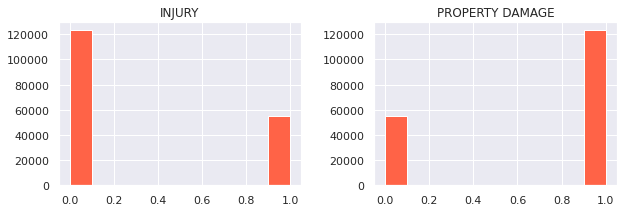

In [71]:
graph_list = df_ds[['INJURY','PROPERTY DAMAGE']]
graph_list.hist(figsize=(10,3),color='tomato')

array([[<AxesSubplot:title={'center':'PERSONCOUNT'}>,
        <AxesSubplot:title={'center':'PEDCOUNT'}>,
        <AxesSubplot:title={'center':'PEDCYLCOUNT'}>],
       [<AxesSubplot:title={'center':'INATTENTIONIND'}>,
        <AxesSubplot:title={'center':'UNDERINFL'}>,
        <AxesSubplot:title={'center':'PEDROWNOTGRNT'}>],
       [<AxesSubplot:title={'center':'SPEEDING'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

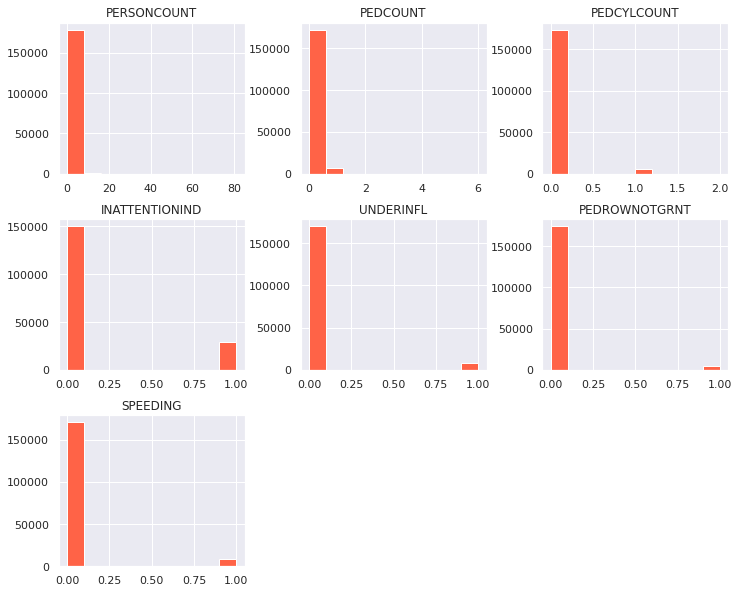

In [72]:
graph_list = df_ds[['PERSONCOUNT', 'PEDCOUNT','PEDCYLCOUNT', 'INATTENTIONIND',
       'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING']]
graph_list.hist(figsize=(12, 10),color='tomato')

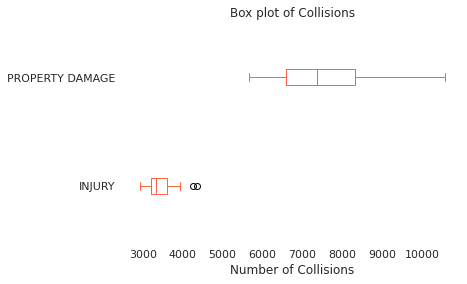

In [73]:
# Box plot of Collisions 
df_yrcolbox=df_ds[["YEAR", 'INJURY', 'PROPERTY DAMAGE']]
df_yrcolbox1=df_yrcolbox.groupby(["YEAR"],as_index=False).sum()
df_yrcolbox1.set_index("YEAR",inplace=True)
df_yrcolbox1.head(1)

ax = df_yrcolbox1.plot(kind='box',  vert=False, figsize=(6, 4),color='tomato')
plt.title('Box plot of Collisions')
plt.xlabel('Number of Collisions')
readability(ax)
plt.show()

In [74]:
df_yrinjscat = df_ds[['YEAR','INJURY','PROPERTY DAMAGE','PERSONCOUNT']]
df_yrinjscat1= df_yrinjscat.groupby(['YEAR'],as_index=False).sum()
#df_yrinjscat1.head(2)
df_yrinjscat1.corr()

,YEAR,INJURY,PROPERTY DAMAGE,PERSONCOUNT
YEAR,1.000000,-0.675900,-0.779242,-0.843778
INJURY,-0.675900,1.000000,0.935394,0.857550
PROPERTY DAMAGE,-0.779242,0.935394,1.000000,0.924085
PERSONCOUNT,-0.843778,0.857550,0.924085,1.000000


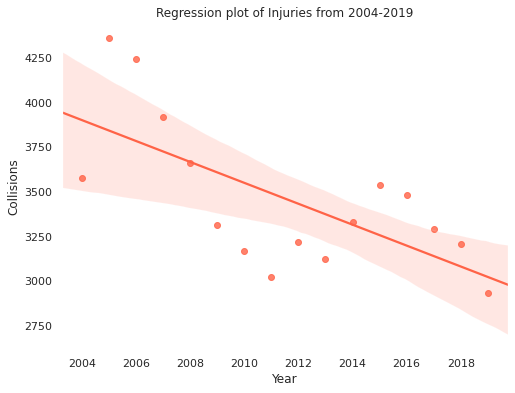

In [75]:
dataframe = df_yrinjscat1
X ="YEAR" 
Y ="INJURY"
title = 'Regression plot of Injuries from 2004-2019'
ylabel= 'Collisions'
xlabel = 'Year'
regressionplot(dataframe,X,Y)

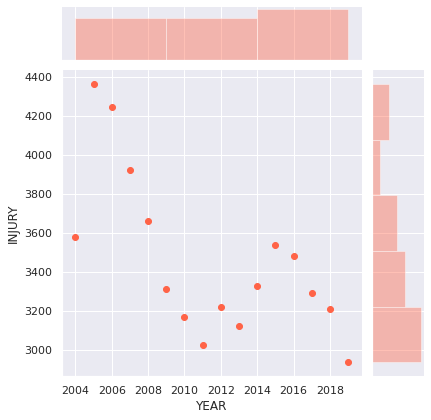

In [76]:
ax = sns.jointplot(data=df_yrinjscat1, x="YEAR", y="INJURY",color='tomato')

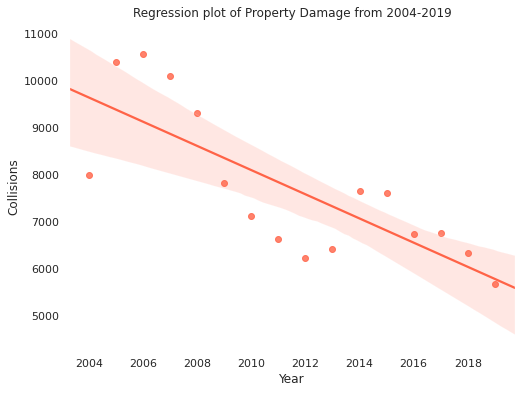

In [77]:
Y = "PROPERTY DAMAGE"
title = 'Regression plot of Property Damage from 2004-2019'
regressionplot(dataframe,X,Y)

<a id='4.4'></a>
____
#### 4.4 Model 1 - Simple Linear Regression
_____

Fit: [-5.86e+01  1.21e+05]
No. of Injuries = -59 * Year + 121426


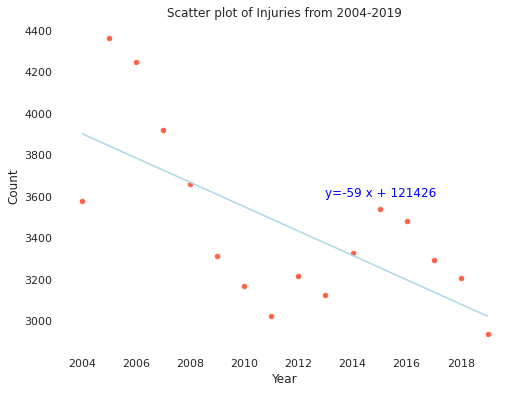

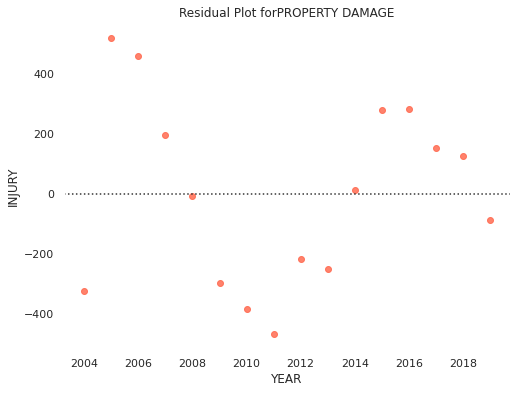

In [78]:
x = df_yrinjscat1['YEAR']      
y = df_yrinjscat1['INJURY']     
fit = np.polyfit(x, y, deg=1)
print("Fit:", fit)

# Scatter plot of Injury
ax = df_yrinjscat1.plot(kind='scatter', x='YEAR', y='INJURY', figsize=(8, 6), color='tomato')
plt.title('Scatter plot of Injuries from 2004-2019')
plt.ylabel('Count')
plt.xlabel('Year')
print('No. of Injuries = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])) 
plt.plot(x, fit[0] * x + fit[1], color='lightblue') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2013, 3600), color='blue')
readability(ax)
plt.show()

title = 'Residual plot for Injury'
standardresidualplot(x,y)

Fit: [-2.57e+02  5.24e+05]
No. of Property Damage = -257 * Year + 524163


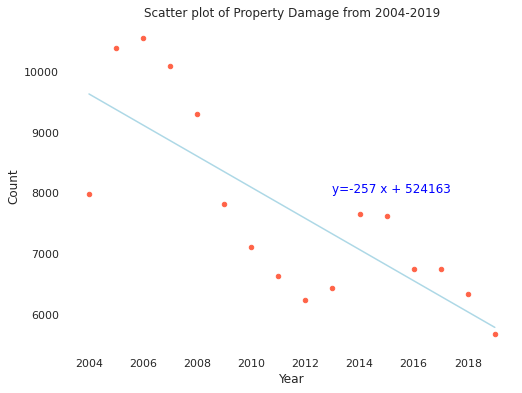

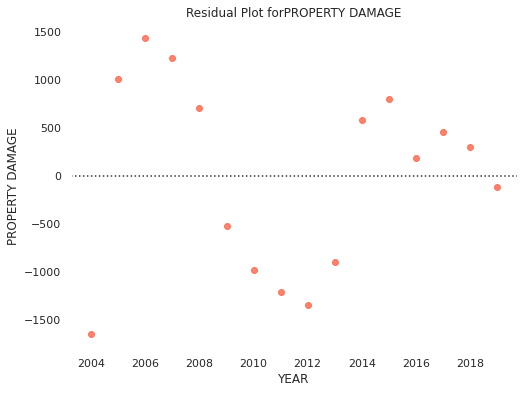

In [79]:
x = df_yrinjscat1['YEAR']      
y = df_yrinjscat1['PROPERTY DAMAGE']     
fit = np.polyfit(x, y, deg=1)
print("Fit:", fit)

# Scatter plot of Injury
ax = df_yrinjscat1.plot(kind='scatter', x='YEAR', y='PROPERTY DAMAGE', figsize=(8, 6), color='tomato')
plt.title('Scatter plot of Property Damage from 2004-2019')
plt.ylabel('Count')
plt.xlabel('Year')
print('No. of Property Damage = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])) 
plt.plot(x, fit[0] * x + fit[1], color='lightblue') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2013, 8000),color='blue')
readability(ax)
plt.show()

title = 'Residual plot for Property Damage'
standardresidualplot(x,y)

<a id='4.5'></a>
____
#### 4.5 Model 2 - Multiple Linear Regression
_____

In [80]:
df_multireg=df_ds.groupby(["YEAR"],as_index=False).sum()
#df_multireg.head(1)

In [81]:
dataframe = df_multireg
Y = ['INJURY']
var_print = 10
runcorrelation(dataframe,Y,var_print)

--------------------------------------------------------------
Table for Top Correlation :
         Y                        X  PEARSON_COEF  P_VALUE
36  INJURY                 DAYLIGHT         0.978      0.0
21  INJURY               REAR ENDED         0.977      0.0
24  INJURY                      DRY         0.975      0.0
40  INJURY                    CLEAR         0.973      0.0
34  INJURY  DARK - STREET LIGHTS ON         0.966      0.0
7   INJURY                      DAY         0.963      0.0
3   INJURY                 VEHCOUNT         0.961      0.0
12  INJURY                        Y         0.959      0.0
6   INJURY                    MONTH         0.959      0.0
9   INJURY                AVGTEMP-F         0.959      0.0
--------------------------------------------------------------
Table for Bottom Correlation :
         Y                  X  PEARSON_COEF   P_VALUE
45  INJURY    WEATHER-UNKNOWN         0.437  0.090947
26  INJURY                OIL         0.434  0.092931
27  

PEARSON CORRELATION :
----------------------------
Intercept:  [45996.25]
Co-efficents:  [[-1.59e-01  5.10e-01  2.47e-02  3.16e-02 -2.22e+01 -1.14e-02]]
                              
ERROR :
----------------------------
Mean Absolute Error (MAE):  64.59
Mean Square Error (MSE):  5461.91
                              
ACCURACY :
----------------------------
R2-score:  0.97


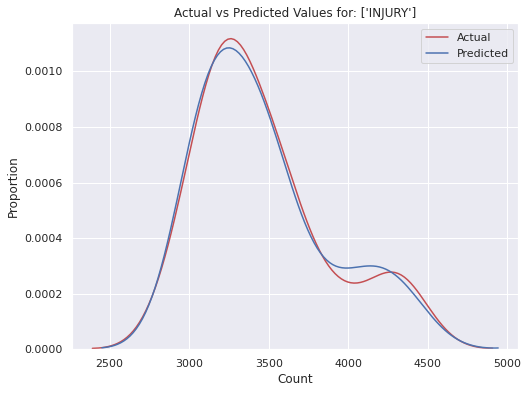

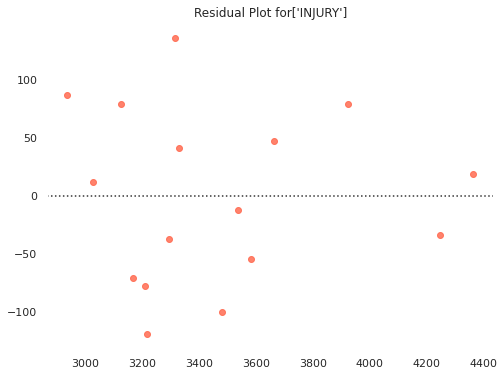

In [82]:
X = ['DRY','CLEAR','MONTH','DAY','YEAR','AVGTEMP-F']
Xreg = dataframe[X]
Yreg = dataframe[Y]
title = 'Actual vs Predicted Values for: ' + str(Y)
runregression(Xreg,Yreg,title) 

In [83]:
interact(runtesttrain, TestSize=(0.05,.4,0.05))

interactive(children=(FloatSlider(value=0.2, description='TestSize', max=0.4, min=0.05, step=0.05), Output()),…

<function __main__.runtesttrain(TestSize)>

In [84]:
crossvalidationresult(Xreg,Yreg)

CROSS VALIDATION SCORE :
----------------------------
Rcross: [ 0.25  0.75  0.63 -0.33]
The mean of the folds are:  0.32 
And the standard deviation is:  0.42

Accuracy: 0.32 (+/- 0.84)

Negative Mean Squared Error:  [69818.96 13932.01  8876.65 51218.8 ]
Prediction: [3254.0, 4067.0, 3973.0, 3824.0, 3697.0]


In [85]:
dataframe = df_multireg
Y = ['PROPERTY DAMAGE']
var_print = 10
runcorrelation(dataframe,Y,var_print)

--------------------------------------------------------------
Table for Top Correlation :
                  Y                        X  PEARSON_COEF       P_VALUE
8   PROPERTY DAMAGE       AVGRAINFALL-INCHES         0.991  0.000000e+00
7   PROPERTY DAMAGE                    MONTH         0.990  0.000000e+00
47  PROPERTY DAMAGE                    BLOCK         0.988  0.000000e+00
30  PROPERTY DAMAGE  DARK - STREET LIGHTS ON         0.976  0.000000e+00
32  PROPERTY DAMAGE                 DAYLIGHT         0.970  0.000000e+00
15  PROPERTY DAMAGE               PARKED CAR         0.967  0.000000e+00
33  PROPERTY DAMAGE                     DUSK         0.965  0.000000e+00
19  PROPERTY DAMAGE                      DRY         0.959  0.000000e+00
36  PROPERTY DAMAGE                    CLEAR         0.947  3.000000e-08
16  PROPERTY DAMAGE               REAR ENDED         0.947  3.000000e-08
--------------------------------------------------------------
Table for Bottom Correlation :
            

PEARSON CORRELATION :
----------------------------
Intercept:  [109678.59]
Co-efficents:  [[ 1.90e-01 -4.27e-01  5.51e-01  2.01e-02 -5.46e+01]]
                              
ERROR :
----------------------------
Mean Absolute Error (MAE):  103.12
Mean Square Error (MSE):  16750.25
                              
ACCURACY :
----------------------------
R2-score:  0.99


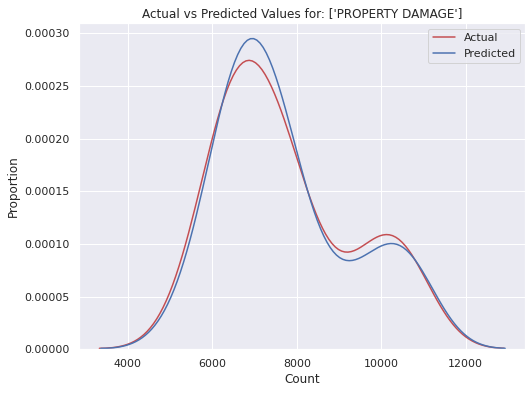

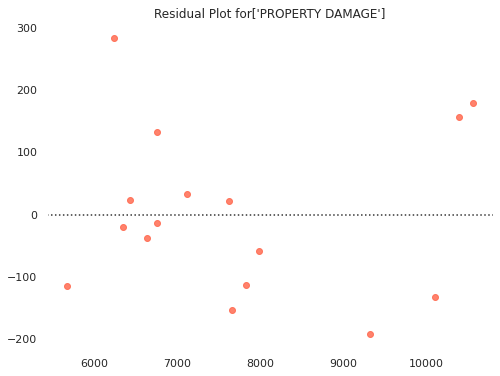

In [86]:
X = ['AVGRAINFALL-INCHES','DRY', 'CLEAR','MONTH','YEAR']
Xreg = dataframe[X]
Yreg = dataframe[Y]
title = 'Actual vs Predicted Values for: ' + str(Y)
runregression(Xreg,Yreg,title)  

In [87]:
interact(runtesttrain, TestSize=(0.05,.4,0.05))

interactive(children=(FloatSlider(value=0.2, description='TestSize', max=0.4, min=0.05, step=0.05), Output()),…

<function __main__.runtesttrain(TestSize)>

In [88]:
crossvalidationresult(Xreg,Yreg)

CROSS VALIDATION SCORE :
----------------------------
Rcross: [0.83 0.96 0.91 0.95]
The mean of the folds are:  0.91 
And the standard deviation is:  0.05

Accuracy: 0.91 (+/- 0.11)

Negative Mean Squared Error:  [186859.19  40972.63  39223.05   9592.19]
Prediction: [8123.0, 11134.0, 10964.0, 10250.0, 8986.0]


<a id='4.6'></a>
____
#### 4.6 Model 3 - Decision Tree (Classification) and Confusion Matrix
_____

In [89]:
dataframe = df_ds
X= ['UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING',
       'CYCLES','PARKED CAR', 'PEDESTRIAN', 'SIDESWIPE', 'DRY']
Y = ['SEVERITYDESC']
Xreg = dataframe[X]
Yreg = dataframe[Y]
testsizelist = np.arange(.05, .55, 0.05)
scorelist = []
severitytree = DecisionTreeClassifier(criterion="entropy", max_depth =3)
for i in testsizelist:
    x_train, x_test, y_train, y_test = train_test_split(Xreg, Yreg, test_size=i, random_state=1)
    severitytree.fit(x_train,y_train)
    predtree = severitytree.predict(x_test)
    res = metrics.accuracy_score(y_test, predtree)
    scorelist.append(res)
df_score=pd.DataFrame({'SIZE': testsizelist,'SCORE': scorelist})
df_score.sort_values(by = "SCORE",ascending=False, inplace=True)
#TestSize= df_score['SIZE'][0:1].to_numpy()
TestSize=round(df_score.iat[0,0],2)

x_train, x_test, y_train, y_test = train_test_split(Xreg, Yreg, test_size=TestSize, random_state=1)
print ('Best Score is for TESTSIZE:',TestSize)
print("---------------------------------------------------------------")
print ('Train Sample:', x_train.shape,  y_train.shape)
print ('Test Sample:', x_test.shape,  y_test.shape)


severitytree.fit(x_train,y_train)
predtree = severitytree.predict(x_test)
predtree_prob = severitytree.predict_proba(x_test)
print("---------------------------------------------------------------")
print("DecisionTrees's Accuracy : ", round(metrics.accuracy_score(y_test, predtree),4))
print("Jaccard Similarity Score : ", round(jaccard_similarity_score(y_test, predtree),4))
print("F1 Score : ", round(f1_score(y_test, predtree, average='weighted') ,4))
print("Log Loss : ", round(log_loss(y_test, predtree_prob),4))
print("---------------------------------------------------------------")
print ("Classification Report :")
print (classification_report(y_test, predtree))

Best Score is for TESTSIZE: 0.35
---------------------------------------------------------------
Train Sample: (116240, 8) (116240, 1)
Test Sample: (62591, 8) (62591, 1)
---------------------------------------------------------------
DecisionTrees's Accuracy :  0.7403
Jaccard Similarity Score :  0.7403
F1 Score :  0.6763
Log Loss :  0.523
---------------------------------------------------------------
Classification Report :
                 precision    recall  f1-score   support

         Injury       0.89      0.19      0.32     19549
Property Damage       0.73      0.99      0.84     43042

      micro avg       0.74      0.74      0.74     62591
      macro avg       0.81      0.59      0.58     62591
   weighted avg       0.78      0.74      0.68     62591



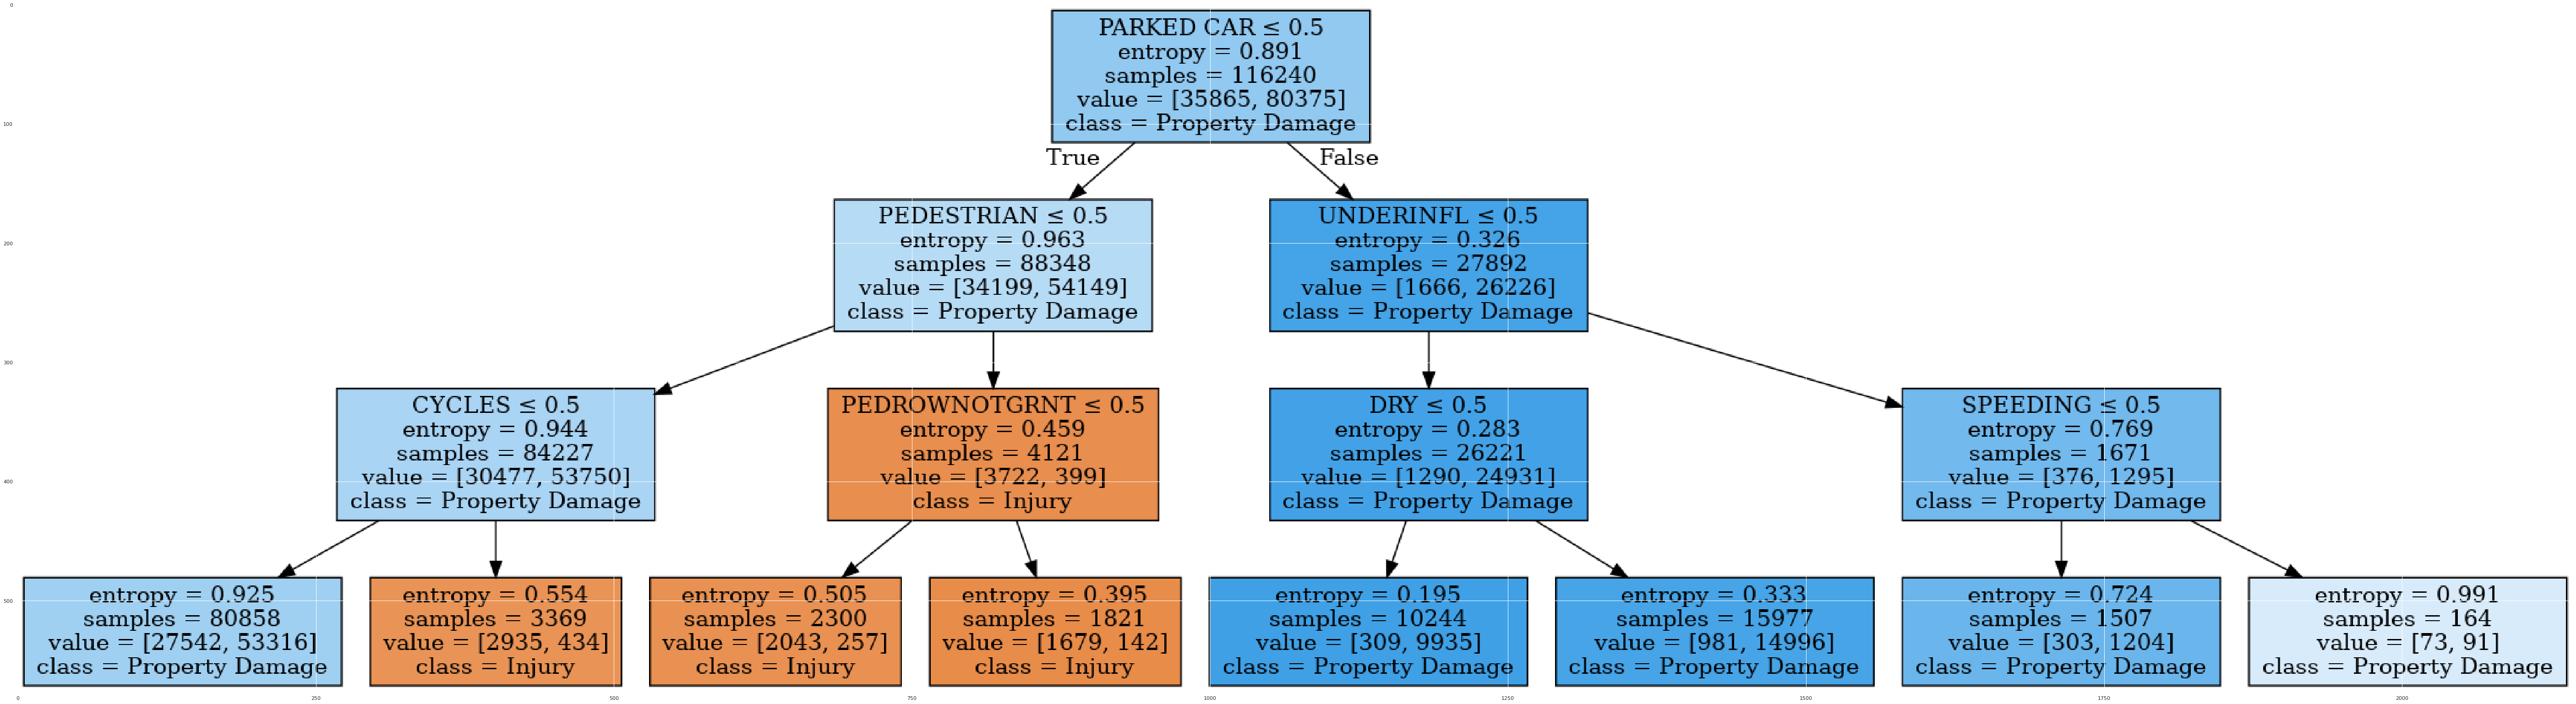

In [90]:
dot_data = StringIO()
filename = "SeverityTree.png"
featureNames = dataframe[X].columns
targetNames = dataframe["SEVERITYDESC"].unique().tolist()
out=tree.export_graphviz(severitytree,feature_names=featureNames, 
                         out_file=dot_data, class_names= np.unique(y_train), filled=True,  
                         special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 100))
plt.imshow(img,interpolation='nearest')

Confusion matrix, without normalization
[[ 3763 15786]
 [  471 42571]]


<Figure size 576x432 with 0 Axes>

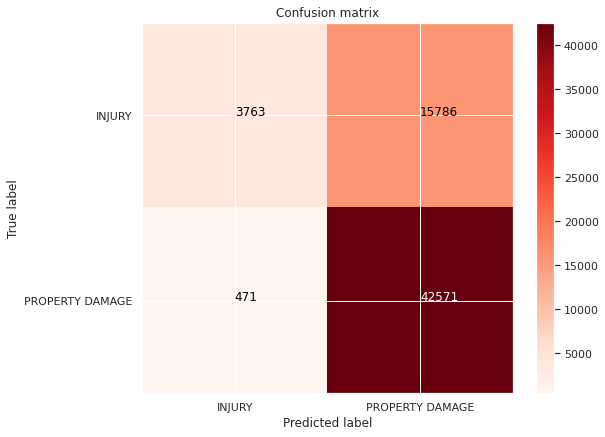

In [91]:
cnf_matrix = confusion_matrix(y_test, predtree, labels=['Injury','Property Damage'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
graphsize(plt)
plot_confusion_matrix(cnf_matrix, classes=['INJURY','PROPERTY DAMAGE'],
                      normalize= False,  title='Confusion matrix')


<a id='5'></a>
____
### 5. Future Applications
______

This analysis has shown a path forward for a technological solution that can analyze the data in real time and can deploy a forecast engine that can generate accurate forecast for "Injury" and "Property Damage" collisions for next 10-20 days. Based on forecast, government can deploy its limited resources to areas where they can get maximum return on investment and effort. 

_____
<strong> <center> Thank You! :)</s>
 _____